In [91]:
print(1)

1


In [92]:
import pandas as pd 
import json
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [93]:
json_path = 'datatran_consolidado.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df.rename(columns={'data_inversa': 'data'}, inplace=True)
df.rename(columns={'dia_semana': 'DiaSemana'}, inplace=True)
df.rename(columns={'tipo_acidente': 'TipoAcidente'}, inplace=True)
df.rename(columns={'condicao_metereologica': 'CondicaoMetereologica'}, inplace=True)

df = df[df['TipoAcidente'].astype(str).str.lower() != 'none']

df['TipoAcidente'] = df['TipoAcidente'].str.replace(' ', '')

df

,data,DiaSemana,horario,uf,municipio,TipoAcidente,CondicaoMetereologica
0,01/01/2020,quarta-feira,05:40:00,PA,SAO FRANCISCO DO PARA,Saidadeleitocarrosavel,Ceu Claro
1,01/01/2020,quarta-feira,06:00:00,MG,UBERABA,Colisaotransversal,Ceu Claro
2,01/01/2020,quarta-feira,06:00:00,BA,CANUDOS,Saidadeleitocarrosavel,Nublado
3,01/01/2020,quarta-feira,10:08:00,SP,APARECIDA,Colisaotraseira,Sol
4,01/01/2020,quarta-feira,12:10:00,MG,JUATUBA,Saidadeleitocarrosavel,Ceu Claro
...,...,...,...,...,...,...,...
380846,28/07/2025,segunda-feira,08:50:00,CE,FORTALEZA,Colisaotraseira,Ceu Claro
380847,26/04/2025,sábado,13:30:00,MG,ARAGUARI,Saidadeleitocarrosavel,Nublado
380848,28/08/2025,quinta-feira,19:20:00,PR,FOZ DO IGUACU,Saidadeleitocarrosavel,Ceu Claro
380849,11/06/2025,quarta-feira,10:30:00,PR,SANTO ANTONIO DO SUDOESTE,Colisaotransversal,Ceu Claro


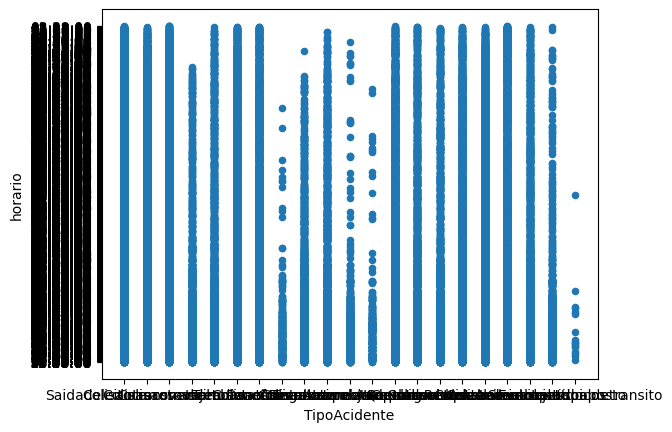

In [96]:
df.plot(kind="scatter", x="TipoAcidente", y="horario");

In [97]:
modelo = linear_model.LinearRegression()

x=df[["horario"]]
y=df[["TipoAcidente"]]

modelo.fit(x, y)

ValueError: could not convert string to float: '05:40:00'

In [ ]:
modelo.predict